In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

In [37]:
X.shape

(506, 13)

In [38]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [40]:
index=np.random.choice(506, 101, replace=False)
X_transform[index]

array([[-0.4152492 , -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.50084979],
       [-0.41834124,  3.16044092, -1.0194363 , ..., -0.2568579 ,
         0.39204125, -0.88212248],
       [-0.41877066,  2.94584308, -1.3316823 , ..., -0.67298414,
         0.37570436, -0.93398678],
       ...,
       [-0.41652931, -0.48772236, -0.86769058, ...,  0.80657583,
         0.44105193, -0.39992467],
       [ 0.26283202, -0.48772236,  1.01599907, ...,  0.80657583,
         0.44105193,  0.94153844],
       [-0.41299272,  2.5166474 , -1.29812315, ..., -1.69018163,
         0.12681342, -1.07696404]])

## mini_batch_GD for linear regression

In [48]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/X.shape[0])*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/X.shape[0])*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/X.shape[0]) * s

   
        
        
# gradient function
def mini_batch_gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 500
    n = len(x)
    linear_loss=[]
    learning_rate = 0.01
    n_iter=[]
    count=1
    batch_size=101
    for i in tqdm(range(epoch)):
        
        for j in range(int(n/batch_size)):
            random_index=np.random.choice(x.shape[0],batch_size,replace=False) #batch size of 101
            x_sample = x[random_index]
            y_sample = y[random_index]
            y_predicted = predicted_y(weight_vector,x_sample,intercept)
            # updation of weight and bias for every batch size
            weight_vector = weight_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
            
            
            
            linear_loss.append(loss(y_sample,y_predicted)) 
            n_iter.append(count)
            count+=1
        
        
    plt.plot(n_iter,linear_loss)
    plt.xlabel("number of iteration")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    
    

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 112.93it/s]


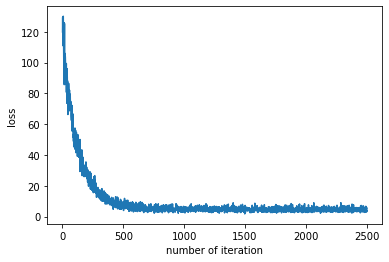

In [49]:
w,b=mini_batch_gradient_descent(X_transform,Y)


In [50]:
print("weight:",w)
print("bias:",b)

weight: [-0.73428813  0.8650556  -0.31333454  0.75795315 -1.3795654   2.81488447
 -0.08932872 -2.69209692  1.48867477 -0.98746929 -1.88996003  0.85715014
 -3.7846456 ]
bias: 22.56098731136974


# predict


In [53]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [54]:
y_pred=predict(X_transform)
y_pred

array([30.71044348, 24.9577656 , 30.7507872 , 29.09939098, 28.42051988,
       25.57176027, 22.98726968, 19.47849763, 11.30705569, 19.00569254,
       19.06159435, 21.63499528, 20.9334761 , 20.16038525, 19.77173082,
       19.86014632, 21.23537498, 17.32781782, 16.58065429, 18.74523323,
       12.67574207, 18.01219212, 16.17374445, 14.05989818, 16.05182226,
       13.73128609, 15.89051236, 15.12904676, 20.06499028, 21.42436813,
       11.72310557, 18.42642473,  9.09115957, 14.48234691, 13.96219781,
       23.56767889, 22.095432  , 23.0665979 , 22.91667898, 30.96372615,
       33.94396836, 28.19285187, 25.23597211, 24.64269084, 22.80293301,
       21.78102012, 20.10802493, 17.65748705,  8.53035988, 16.92525843,
       20.97058935, 23.64676807, 27.59619647, 23.86720884, 16.49168393,
       30.89108121, 25.49874392, 32.54121725, 21.83249782, 20.8416689 ,
       17.55427821, 18.04458914, 23.84241759, 22.69704729, 24.02143742,
       30.14890516, 25.13389169, 21.54814033, 17.71292411, 21.17

In [55]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,30.7
1,21.6,25.0
2,34.7,30.8
3,33.4,29.1
4,36.2,28.4
...,...,...
501,22.4,23.9
502,20.6,22.6
503,23.9,28.0
504,22.0,26.5


# sklearn

In [31]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
model.intercept_

array([22.53049421])

In [33]:
model.coef_

array([-0.81589739,  0.91268359, -0.16276166,  0.71300785, -1.81615915,
        2.75186925, -0.04546646, -2.97644044,  1.80125191, -1.16941354,
       -1.98864102,  0.85320111, -3.6691723 ])

In [51]:
w

array([-0.73428813,  0.8650556 , -0.31333454,  0.75795315, -1.3795654 ,
        2.81488447, -0.08932872, -2.69209692,  1.48867477, -0.98746929,
       -1.88996003,  0.85715014, -3.7846456 ])

In [52]:
b

22.56098731136974